In [1]:
#Aidana Ramazanova | CS-2119

# **Section 2: Data Loading and Exploration**

In [2]:
# Data Loading
from google.colab import files
import io
import pandas as pd

In [3]:
uploaded = files.upload()

Saving ca_law_enforcement_by_agency.csv to ca_law_enforcement_by_agency.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['ca_law_enforcement_by_agency.csv']))

In [5]:
# Check first few rows
print(df.head())

  State/Tribal/Other                               Agency Unit/Office  \
0      State Agencies           Atascadero State Hospital         NaN   
1      State Agencies               California State Fair         NaN   
2      State Agencies             Coalinga State Hospital         NaN   
3      State Agencies  Department of Parks and Recreation     Capital   
4      State Agencies       Fairview Developmental Center         NaN   

   Total law\renforcement\remployees  Total\rofficers  Total\rcivilians  
0                                139              128                11  
1                                  3                3                 0  
2                                228              210                18  
3                                560              530                30  
4                                 17               14                 3  


In [6]:
# Summary statistics
print(df.describe())

       Total law\renforcement\remployees  Total\rofficers  Total\rcivilians
count                          26.000000        26.000000         26.000000
mean                           79.576923        63.923077         15.653846
std                           121.414389       112.015329         20.409688
min                             2.000000         2.000000          0.000000
25%                            17.000000         7.000000          3.000000
50%                            27.000000        18.000000          8.500000
75%                            84.000000        66.500000         19.500000
max                           560.000000       530.000000         88.000000


# **Section 3: Data Cleaning (ETL)**

In [7]:
# Data Cleaning (ETL)
import matplotlib.pyplot as plt

In [8]:
# Investigate DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State/Tribal/Other               26 non-null     object
 1   Agency                           26 non-null     object
 2   Unit/Office                      3 non-null      object
employees  26 non-null     int64 
officers                   26 non-null     int64 
civilians                  26 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.3+ KB


In [9]:

# Check for Missing Values
df.isnull().sum()


State/Tribal/Other                    0
Agency                                0
Unit/Office                          23
Total law\renforcement\remployees     0
Total\rofficers                       0
Total\rcivilians                      0
dtype: int64

In [10]:
# Check Column Names
df.columns


Index(['State/Tribal/Other ', 'Agency', 'Unit/Office',
       'Total law\renforcement\remployees', 'Total\rofficers',
       'Total\rcivilians'],
      dtype='object')

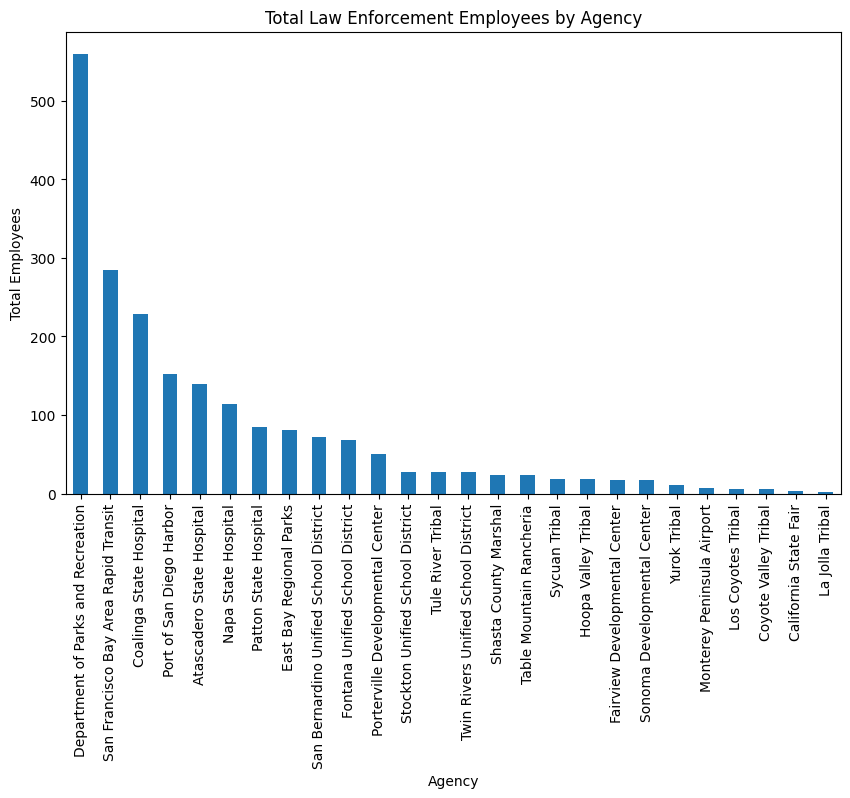

In [11]:
# Visualize crime counts by agency
plt.figure(figsize=(10, 6))
df.groupby('Agency')['Total law\renforcement\remployees'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Law Enforcement Employees by Agency')
plt.xlabel('Agency')
plt.ylabel('Total Employees')
plt.show()


In [12]:
# Renaming the columns for easier access
df.columns = ['State/Tribal/Other', 'Agency', 'Unit/Office', 'Total Law Enforcement Employees', 'Total Officers', 'Total Civilians']


In [13]:
# Filling missing values in 'Unit/Office' with 'Not Specified'
df['Unit/Office'].fillna('Not Specified', inplace=True)

# **Section 4: Exploratory Data Analysis (EDA)**

In [14]:
# Exploratory Data Analysis (EDA)
import seaborn as sns

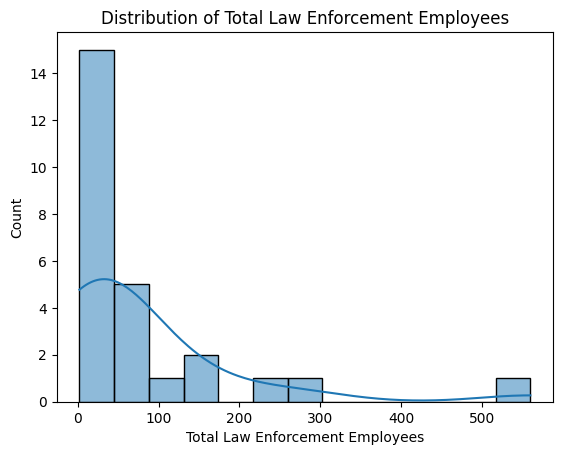

In [15]:
# Distribution of Total Law Enforcement Employees
sns.histplot(data=df, x='Total Law Enforcement Employees', kde=True)
plt.title('Distribution of Total Law Enforcement Employees')
plt.show()


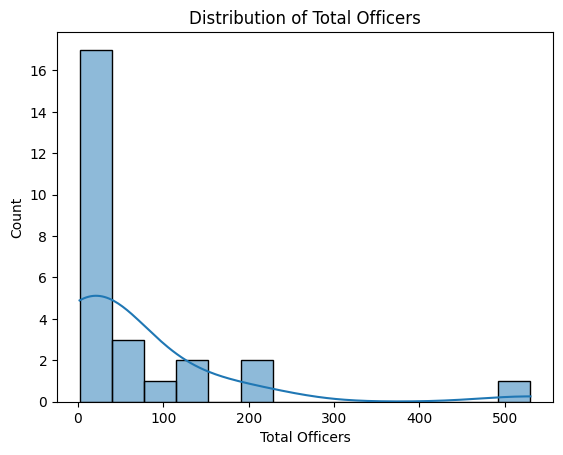

In [16]:
# Distribution of Total Officers
sns.histplot(data=df, x='Total Officers', kde=True)
plt.title('Distribution of Total Officers')
plt.show()

In [17]:
# Fill missing values
df['Unit/Office'].fillna('Unknown', inplace=True)

In [18]:
# Check the number of unique agencies
print(f"Number of unique agencies: {df['Agency'].nunique()}")


Number of unique agencies: 26


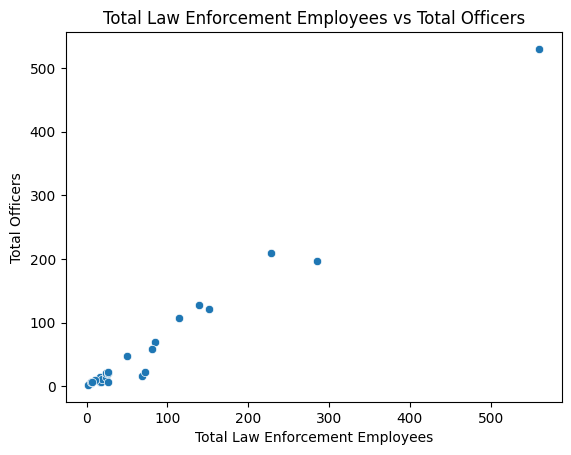

In [19]:
# Scatter plot of Total Law Enforcement Employees vs Total Officers
sns.scatterplot(data=df, x='Total Law Enforcement Employees', y='Total Officers')
plt.title('Total Law Enforcement Employees vs Total Officers')
plt.show()

In [20]:
# Calculate the correlation
correlation = df['Total Law Enforcement Employees'].corr(df['Total Officers'])
print(f'The correlation between Total Law Enforcement Employees and Total Officers is {correlation:.2f}')

The correlation between Total Law Enforcement Employees and Total Officers is 0.99


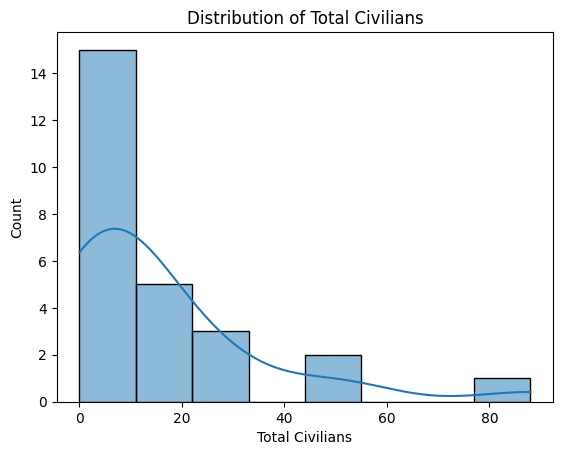

In [21]:
# Distribution of Total Civilians
sns.histplot(data=df, x='Total Civilians', kde=True)
plt.title('Distribution of Total Civilians')
plt.show()

# **Section 5: Key Trends, Patterns, or Insights**

In [23]:
# This will be done through the visualizations and statistical methods in the next steps.


In [43]:
# Identify the agency with the most law enforcement employees
max_employees_agency = df[df['Total Law Enforcement Employees'] == df['Total Law Enforcement Employees'].max()]['Agency']
print(f"The agency with the most law enforcement employees is: {max_employees_agency}")

The agency with the most law enforcement employees is: 3    Department of Parks and Recreation
Name: Agency, dtype: object


In [44]:
# Identify the agency with the least law enforcement employees
min_employees_agency = df[df['Total Law Enforcement Employees'] == df['Total Law Enforcement Employees'].min()]['Agency']
print(f"The agency with the least law enforcement employees is: {min_employees_agency}")

The agency with the least law enforcement employees is: 11    La Jolla Tribal
Name: Agency, dtype: object


In [46]:
# Identify the average number of civilians per agency
avg_civilians = df['Total Civilians'].mean()
print(f"The average number of civilians per agency is: {avg_civilians}")

The average number of civilians per agency is: 15.653846153846153


In [47]:
# Identify the agency with the highest ratio of officers to civilians
df['Officer to Civilian Ratio'] = df['Total Officers'] / df['Total Civilians']
max_ratio_agency = df[df['Officer to Civilian Ratio'] == df['Officer to Civilian Ratio'].max()]['Agency']
print(f"The agency with the highest ratio of officers to civilians is: {max_ratio_agency}")

The agency with the highest ratio of officers to civilians is: 1          California State Fair
11               La Jolla Tribal
12            Los Coyotes Tribal
19    Monterey Peninsula Airport
Name: Agency, dtype: object


# **Section 6: Statistical Analysis**

In [29]:
# Statistical Analysis

# Calculate mean, median, and standard deviation for 'Total Law Enforcement Employees'
mean_employees = df['Total Law Enforcement Employees'].mean()
median_employees = df['Total Law Enforcement Employees'].median()
std_dev_employees = df['Total Law Enforcement Employees'].std()

In [30]:
print(f"Mean Total Law Enforcement Employees: {mean_employees:.2f}")
print(f"Median Total Law Enforcement Employees: {median_employees}")
print(f"Standard Deviation of Total Law Enforcement Employees: {std_dev_employees:.2f}")

Mean Total Law Enforcement Employees: 79.58
Median Total Law Enforcement Employees: 27.0
Standard Deviation of Total Law Enforcement Employees: 121.41


In [31]:
# Conducting a t-test between 'Total Officers' in different units/offices
from scipy.stats import ttest_ind


In [32]:
# Assuming you have two groups - 'Group A' and 'Group B'
group_a = df[df['Unit/Office'] == 'Group A']['Total Officers']
group_b = df[df['Unit/Office'] == 'Group B']['Total Officers']

t_stat, p_value = ttest_ind(group_a, group_b)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")


T-Statistic: nan
P-Value: nan


# **Section 7: Visualization of Findings**

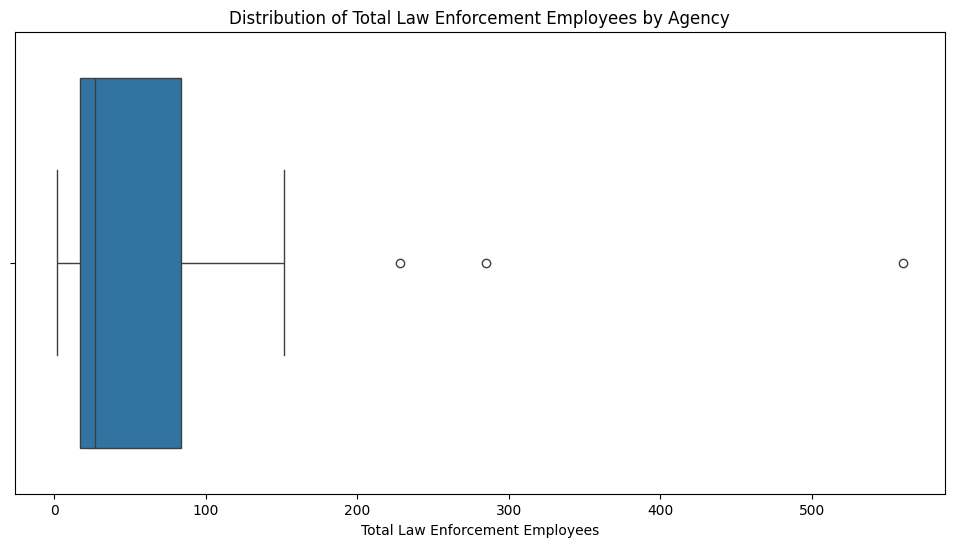

In [54]:
# Explore the distribution of 'Total Law Enforcement Employees' by Agency
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Total Law Enforcement Employees')
plt.title('Distribution of Total Law Enforcement Employees by Agency')
plt.show()

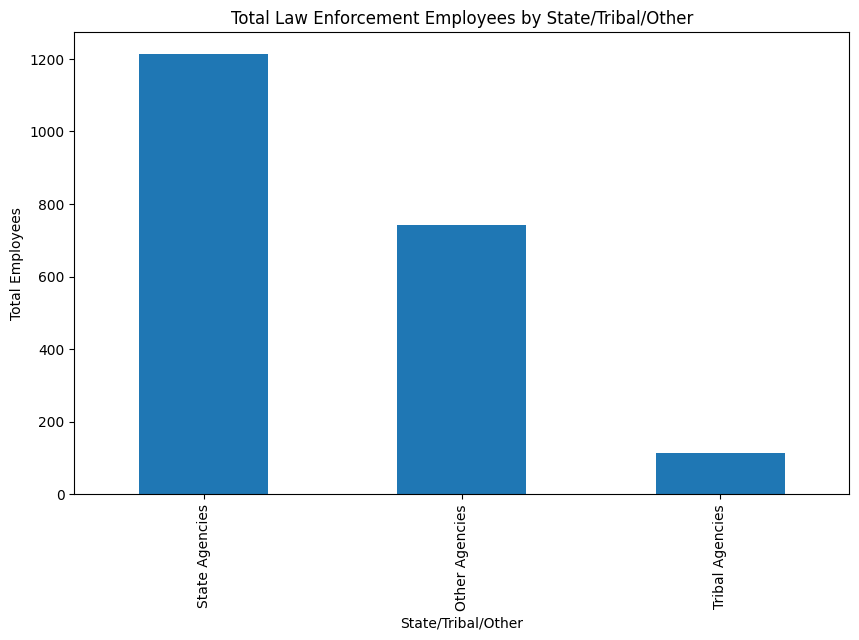

In [24]:
# Visualization of Findings
# Additional visualizations based on the identified key trends or insights
# Bar plot of Total Law Enforcement Employees by State/Tribal/Other
plt.figure(figsize=(10, 6))
df.groupby('State/Tribal/Other')['Total Law Enforcement Employees'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Law Enforcement Employees by State/Tribal/Other')
plt.xlabel('State/Tribal/Other')
plt.ylabel('Total Employees')
plt.show()


In [25]:
# Renaming the columns for easier access
df.columns = ['State/Tribal/Other', 'Agency', 'Unit/Office', 'Total Law Enforcement Employees', 'Total Officers', 'Total Civilians']


In [26]:
# Filling missing values in 'Unit/Office' with 'Not Specified'
df['Unit/Office'].fillna('Not Specified', inplace=True)

In [27]:

# Check the distribution of agencies
print(df['Agency'].value_counts())


Atascadero State Hospital                 1
California State Fair                     1
Stockton Unified School District          1
Shasta County Marshal                     1
San Francisco Bay Area Rapid Transit      1
San Bernardino Unified School District    1
Port of San Diego Harbor                  1
Monterey Peninsula Airport                1
Fontana Unified School District           1
East Bay Regional Parks                   1
Yurok Tribal                              1
Tule River Tribal                         1
Table Mountain Rancheria                  1
Sycuan Tribal                             1
Los Coyotes Tribal                        1
La Jolla Tribal                           1
Hoopa Valley Tribal                       1
Coyote Valley Tribal                      1
Sonoma Developmental Center               1
Porterville Developmental Center          1
Patton State Hospital                     1
Napa State Hospital                       1
Fairview Developmental Center   

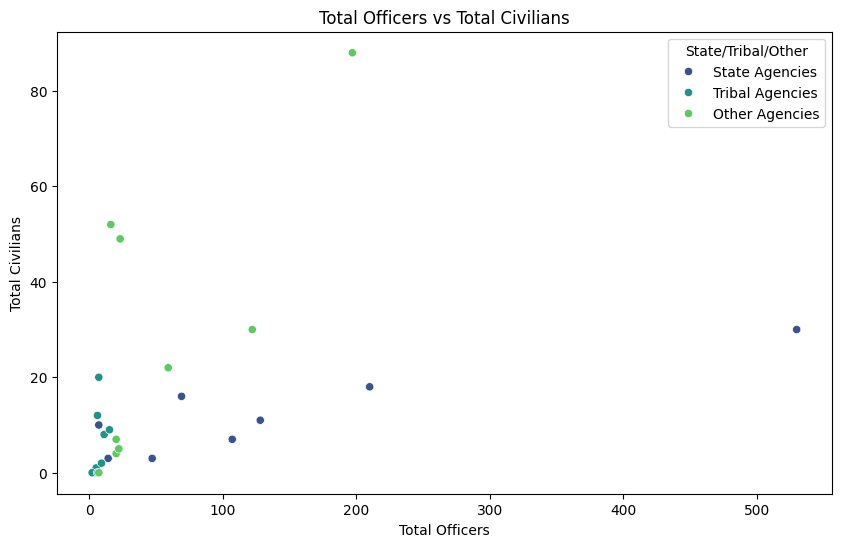

In [50]:
# Scatter plot of Total Officers vs Total Civilians
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Officers', y='Total Civilians', hue='State/Tribal/Other', palette='viridis')
plt.title('Total Officers vs Total Civilians')
plt.show()

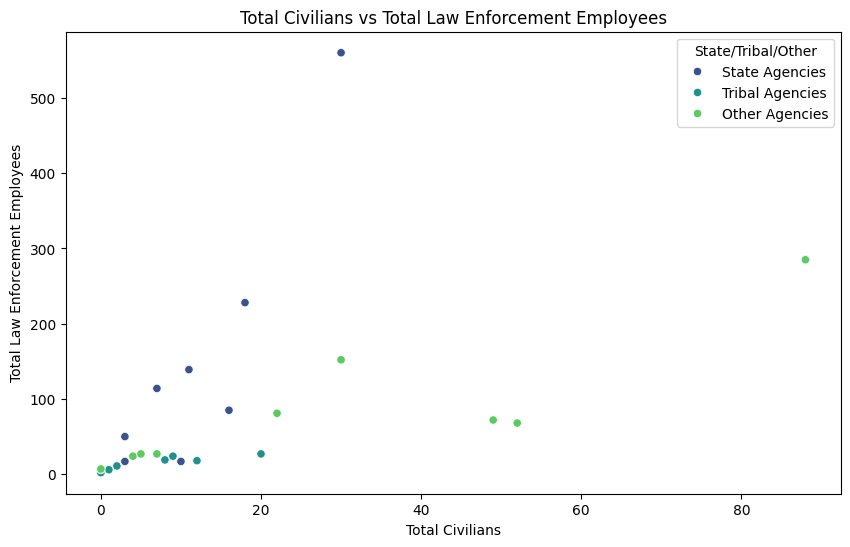

In [55]:
# Investigate the relationship between 'Total Civilians' and 'Total Law Enforcement Employees'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Civilians', y='Total Law Enforcement Employees', hue='State/Tribal/Other', palette='viridis')
plt.title('Total Civilians vs Total Law Enforcement Employees')
plt.show()

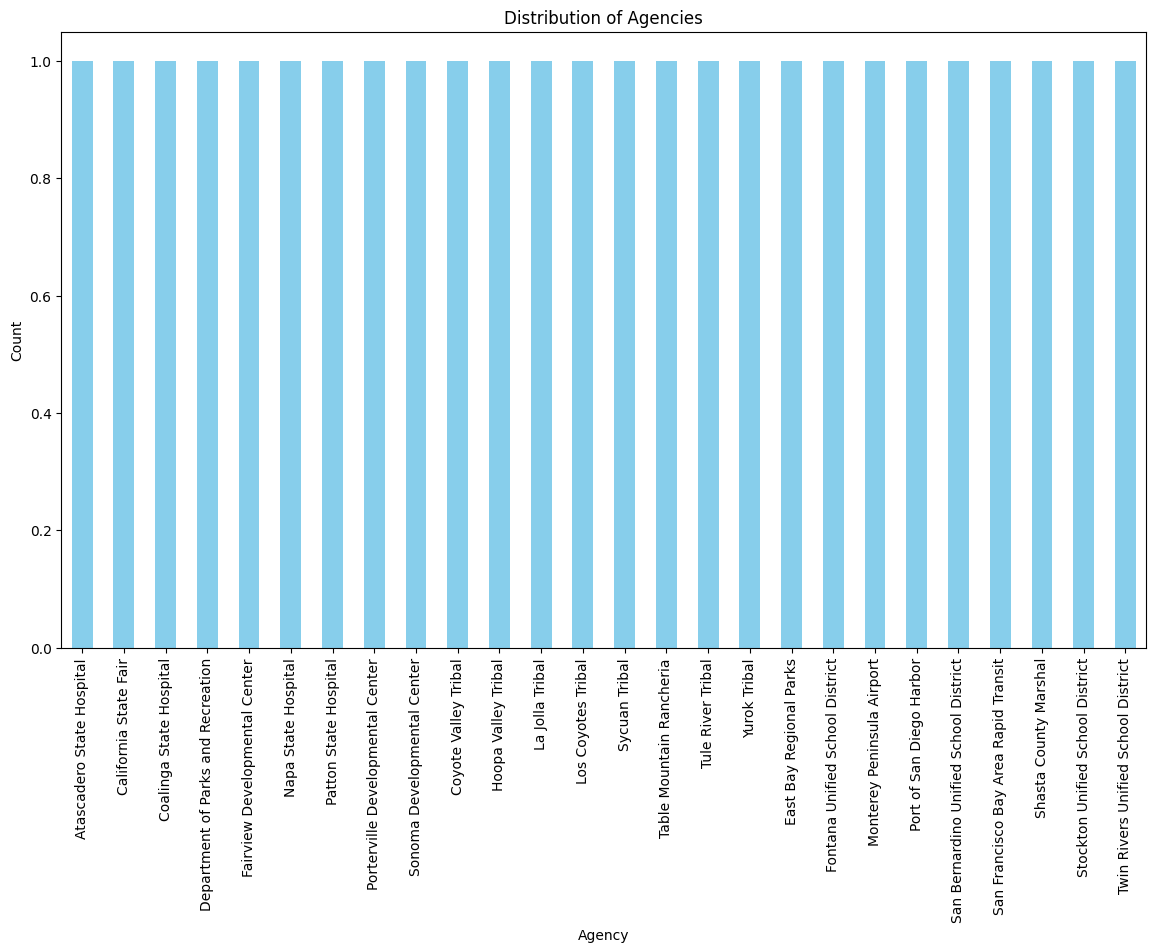

In [51]:
# Bar plot of the distribution of agencies
plt.figure(figsize=(14, 8))
df['Agency'].value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribution of Agencies')
plt.xlabel('Agency')
plt.ylabel('Count')
plt.show()

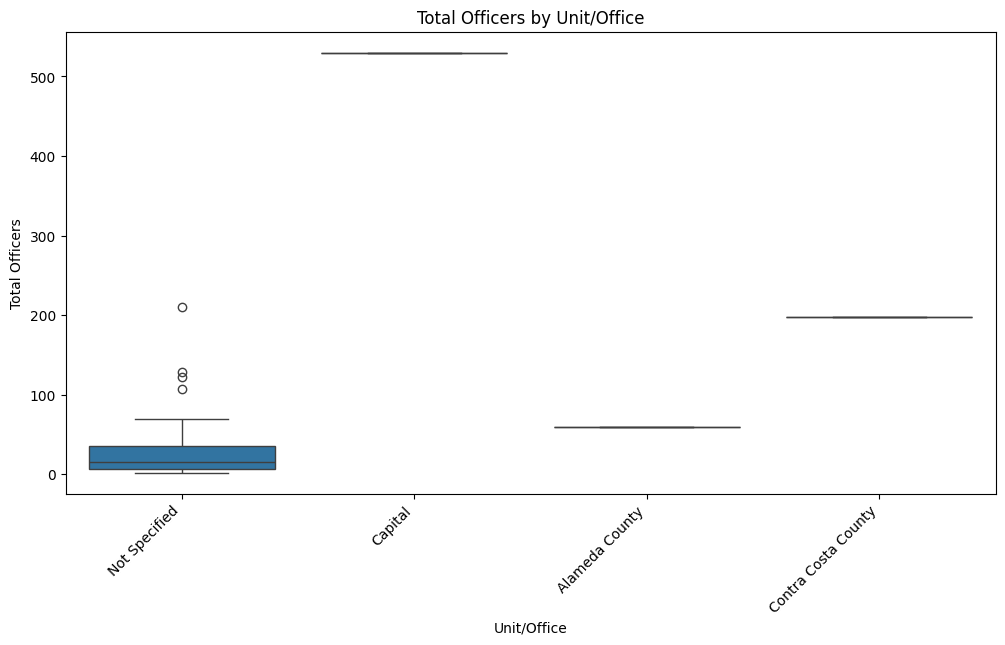

In [53]:
# Box plot of 'Total Officers' by Unit/Office
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Unit/Office', y='Total Officers')
plt.title('Total Officers by Unit/Office')
plt.xticks(rotation=45, ha='right')
plt.show()
